In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.drop('Species', axis=1, inplace=True)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.isnull().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.shape

(159, 6)

# Selection of dependent and independent values

In [6]:
x=df.drop('Weight',axis=1)
y=df['Weight']
print(x.shape)
print(y.shape)

(159, 5)
(159,)


In [7]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test =train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(119, 5)
(119,)
(40, 5)
(40,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
m1=Sequential()
m1.add(Dense(25,activation='relu',input_dim=5))
m1.add(Dense(12,activation='relu'))
m1.add(Dense(6,activation='relu'))
m1.add(Dense(1))

m1.compile(optimizer='adam',loss='mse')



In [10]:
h1=m1.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 50ms/step - loss: 256598.0312 - val_loss: 367490.4688
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 255882.3594 - val_loss: 366533.5938
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 255187.0938 - val_loss: 365597.0938
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 254516.9531 - val_loss: 364686.2188
Epoch 5/20
4/4 [==============================] - 0s 14ms/step - loss: 253868.9375 - val_loss: 363762.2500
Epoch 6/20
4/4 [==============================] - 0s 13ms/step - loss: 253161.0781 - val_loss: 362800.9688
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 252397.4531 - val_loss: 361798.6875
Epoch 8/20
4/4 [==============================] - 0s 12ms/step - loss: 251651.9375 - val_loss: 360705.0625
Epoch 9/20
4/4 [==============================] - 0s 13ms/step - loss: 250828.5156 - val_loss: 359525.7500
Epoch 10/20
4/4 [====================

In [11]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,val_loss,Epochs
15,242997.859375,348470.2500,15
16,241553.171875,346462.3750,16
17,240010.984375,344359.3125,17
18,238422.656250,342087.8125,18
19,236700.000000,339649.7500,19


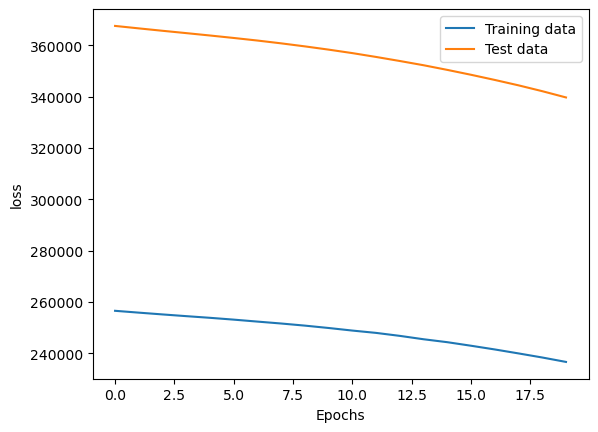

In [14]:
plt.plot(r1['Epochs'],r1['loss'], label='Training data')
plt.plot(r1['Epochs'],r1['val_loss'], label='Test data')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()